In [7]:
pip install cuml-cu11 dask-cudf-cu11 -f https://rapids.ai/pip/cu11

Looking in links: https://rapids.ai/pip/cu11

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install numpy scikit-learn joblib matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
from cuml.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import os

In [10]:
# Check for GPU availability
try:
    import cuml
    print("cuML is available. Using GPU acceleration.")
except ImportError:
    raise RuntimeError("cuML is not installed. Please install RAPIDS cuML for GPU-accelerated SVM.")

cuML is available. Using GPU acceleration.


In [11]:
# Loading Saved Data
print("Loading Saved Data")
train_features = np.load('train_features_reduced.npy')
train_labels = np.load('train_labels_reduced.npy')
test_features = np.load('test_features_reduced.npy')
test_labels = np.load('test_labels_reduced.npy')
val_features = np.load('val_features_reduced.npy')
val_labels = np.load('val_labels_reduced.npy')

print("Scaling Loaded Data")
scaler = joblib.load('scaler.pkl')
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

Loading Saved Data
Scaling Loaded Data


In [12]:
print("Starting SVM training")
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(train_features, train_labels)
print("Training complete")

# Save the SVM model
joblib.dump(svm, 'svm_model_reduced.pkl')
print("SVM model saved.")

Starting SVM training
Training complete
SVM model saved.


Evaluating on validation data
Validation Accuracy: 0.9602
Evaluating on test data
Test Accuracy: 0.9636
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6104
           1       0.97      0.97      0.97      9977

    accuracy                           0.96     16081
   macro avg       0.96      0.96      0.96     16081
weighted avg       0.96      0.96      0.96     16081



<Figure size 800x600 with 0 Axes>

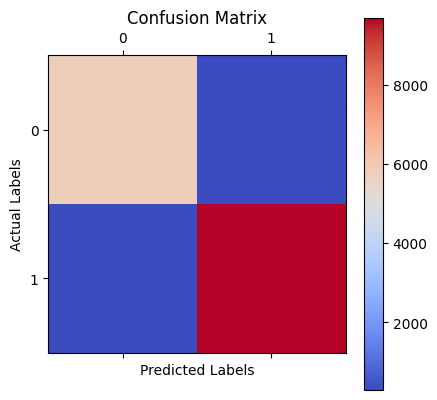

In [14]:
# Evaluate on validation data
print("Evaluating on validation data")
val_preds = svm.predict(val_features)
val_accuracy = accuracy_score(val_labels, val_preds)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test data
print("Evaluating on test data")
test_preds = svm.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification report and confusion matrix
print("Classification Report on Test Set:")
print(classification_report(test_labels, test_preds))

conf_matrix = confusion_matrix(test_labels, test_preds)

# Save confusion matrix plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  # Create a new figure
plt.matshow(conf_matrix, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.savefig('confusion_matrix.png')
plt.show()



Strong Performance Across Both Classes: The model shows excellent precision, recall, and F1-scores for both the Real (0) and AI (1) classes. The AI class, in particular, has a high precision and recall, which indicates that the model is very accurate in predicting instances of AI.

High Test Accuracy: With a 96.36% test accuracy, the model demonstrates strong generalization and performs very well on unseen data.

Balanced Performance: The recall for both classes is above 0.95, meaning the model does not favor one class over the other and handles the classification task effectively.